In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Times New Roman',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Parse and plot spot instance prices

In [2]:
import os
import json

def read_json_files(directory):
    per_instance_type_spot_prices = {}
    for filename in os.listdir(directory):
        full_filepath = os.path.join(directory, filename)
        with open(full_filepath, 'r') as f:
            json_obj = json.load(f)
            for x in json_obj['SpotPriceHistory']:
                instance_type = x['InstanceType']
                if instance_type not in per_instance_type_spot_prices:
                    per_instance_type_spot_prices[instance_type] = []
                per_instance_type_spot_prices[instance_type].append(x)
    return per_instance_type_spot_prices

In [3]:
from datetime import datetime

def plot_prices(per_instance_type_spot_prices):
    for instance_type in per_instance_type_spot_prices:
        print(instance_type)

        plt.figure(figsize=(15, 3.5))
        ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
        
        availability_zones = [x['AvailabilityZone']
                              for x in per_instance_type_spot_prices[instance_type]]
        
        for availability_zone in set(availability_zones):
            spot_prices = [float(x['SpotPrice'])
                           for x in per_instance_type_spot_prices[instance_type]
                           if x['AvailabilityZone'] == availability_zone]
            timestamps = [matplotlib.dates.date2num(datetime.strptime(x['Timestamp'],
                                                                      '%Y-%m-%dT%H:%M:%S.000Z'))
                          for x in per_instance_type_spot_prices[instance_type]
                          if x['AvailabilityZone'] == availability_zone]

            ax.plot(timestamps, spot_prices, label=availability_zone)

        ax.set_ylabel("Price ($)")
        ax.set_xlabel("Timestamp")
        sns.despine()
        
        leg = plt.figlegend(ncol=4, frameon=False, labelspacing=0.25,
                            columnspacing=0.8, handlelength=1.5,
                            loc='upper center')
        
        bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
        y_offset = 0.25
        bb.y0 += y_offset
        bb.y1 += y_offset
        leg.set_bbox_to_anchor(bb, transform=ax.transAxes)
        
        plt.show()

p3.2xlarge


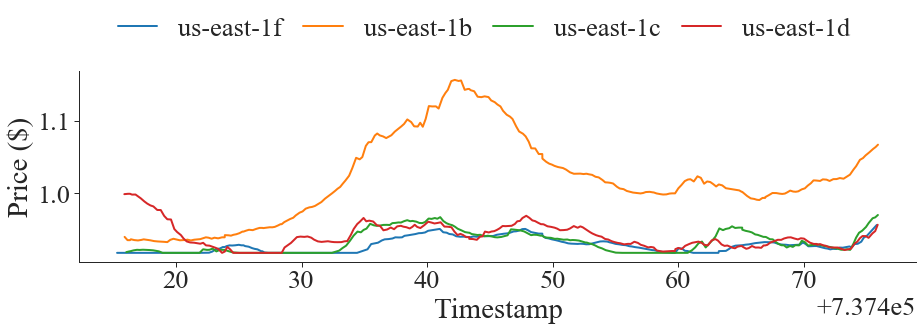

p2.16xlarge


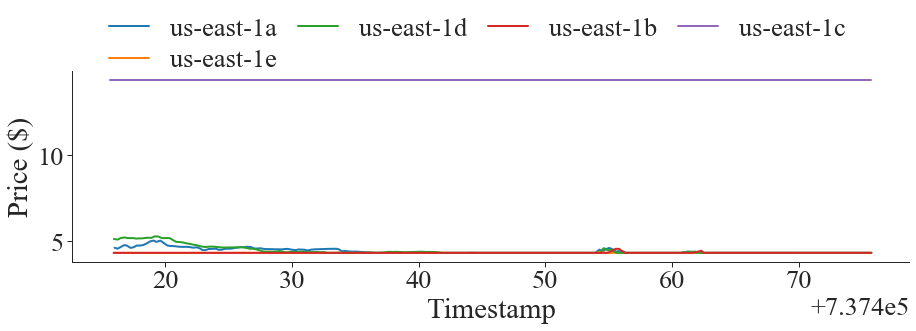

p2.xlarge


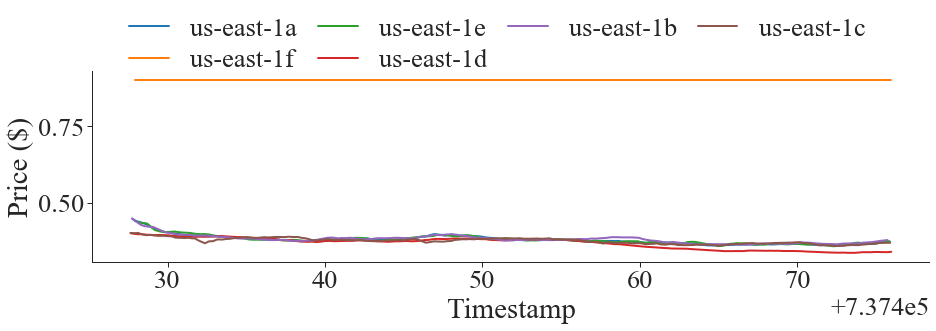

p3.8xlarge


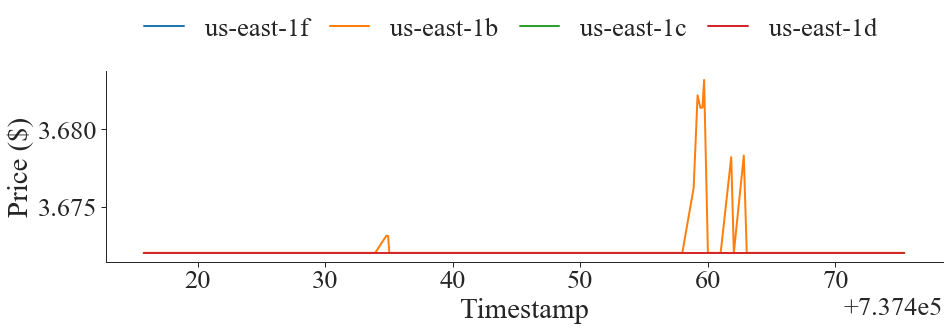

p2.8xlarge


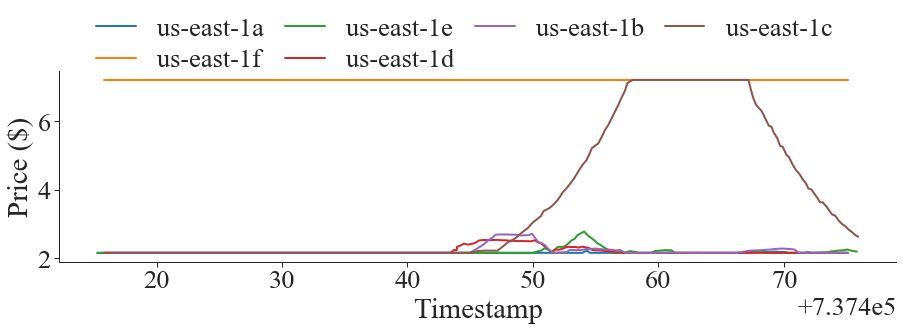

p3.16xlarge


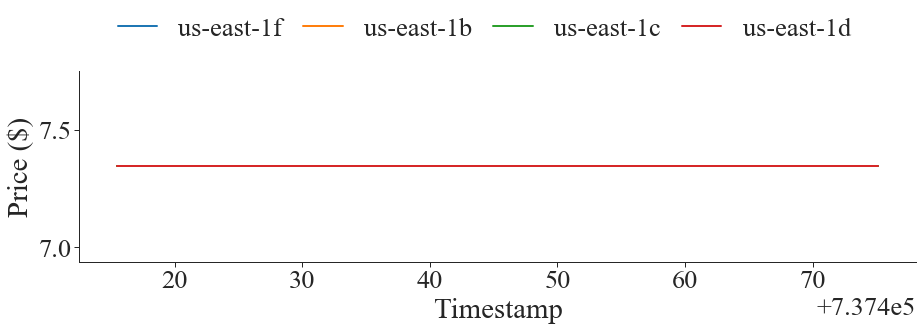

In [4]:
plot_prices(read_json_files("../logs/us-east-1"))

p3.2xlarge


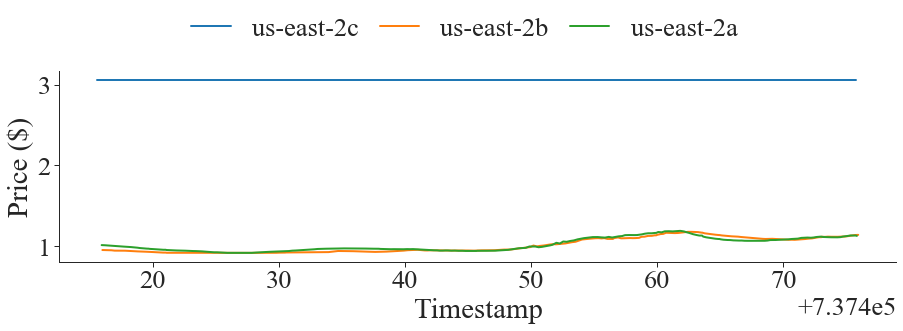

p2.16xlarge


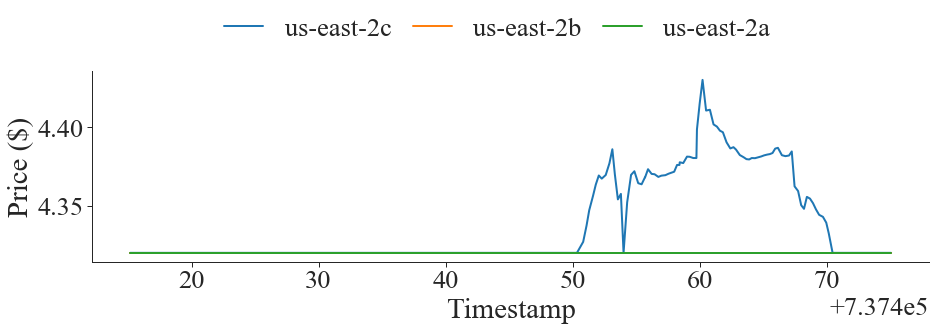

p2.xlarge


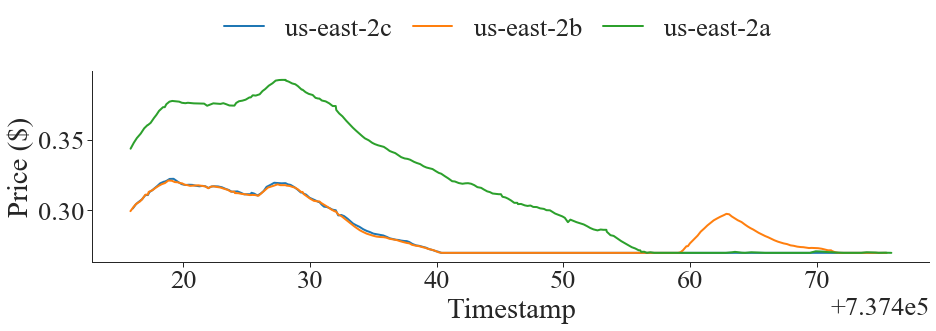

p3.8xlarge


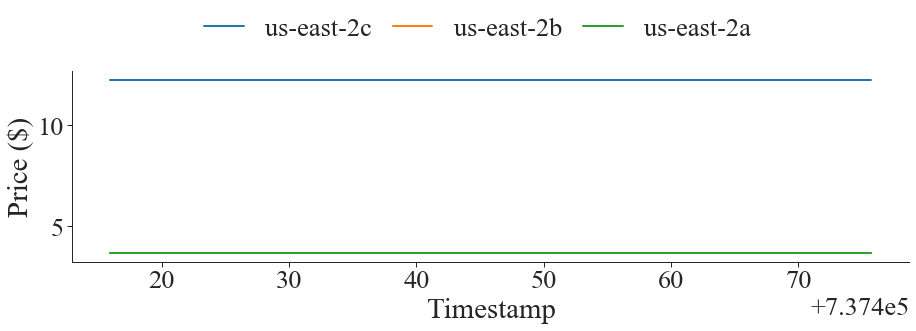

p2.8xlarge


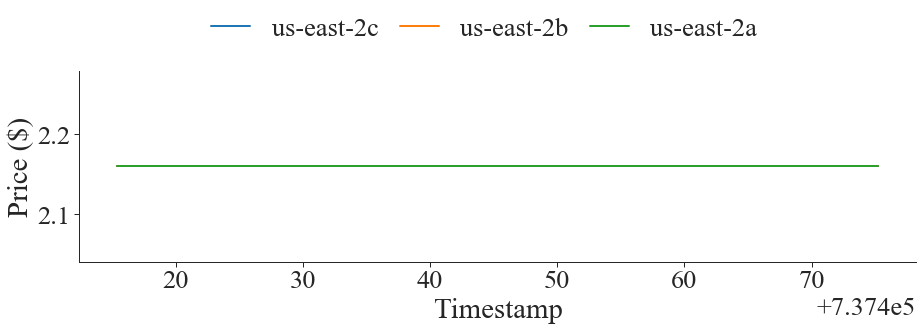

p3.16xlarge


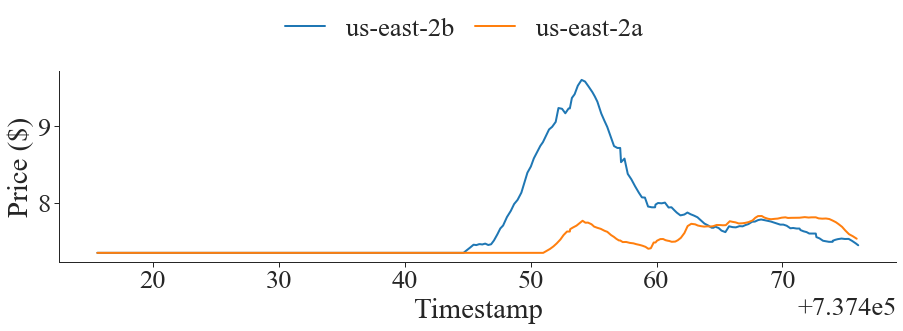

In [5]:
plot_prices(read_json_files("../logs/us-east-2"))

p3.2xlarge


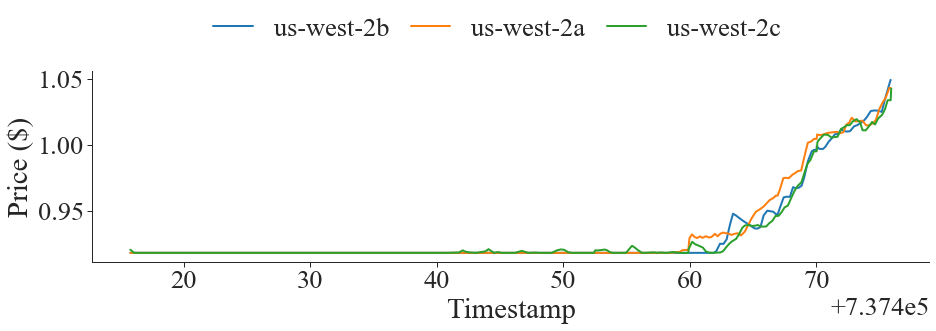

p2.16xlarge


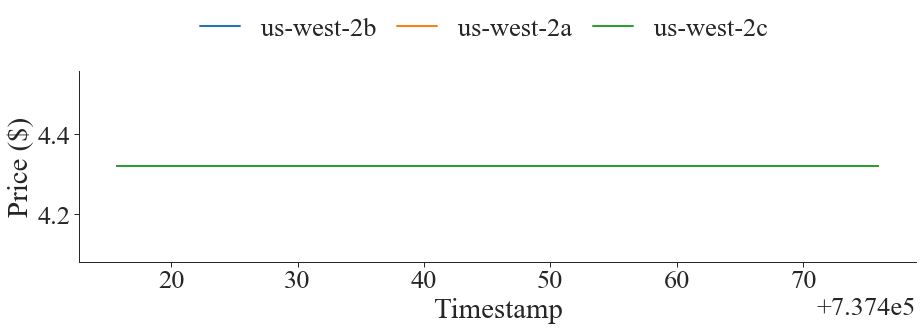

p2.xlarge


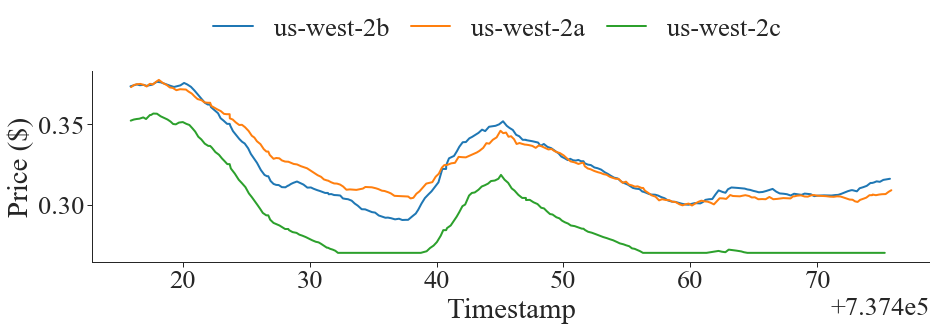

p3.8xlarge


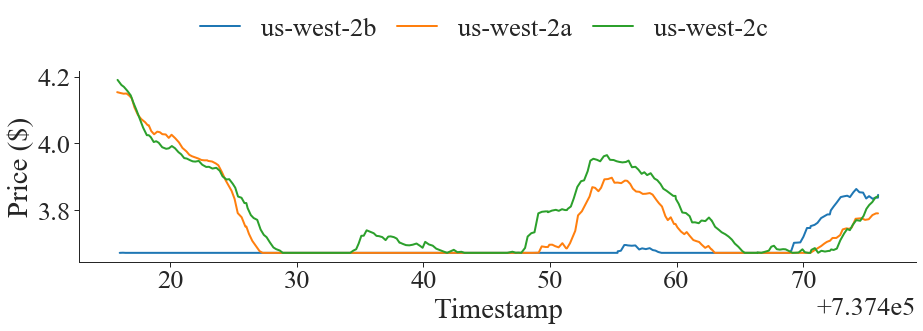

p2.8xlarge


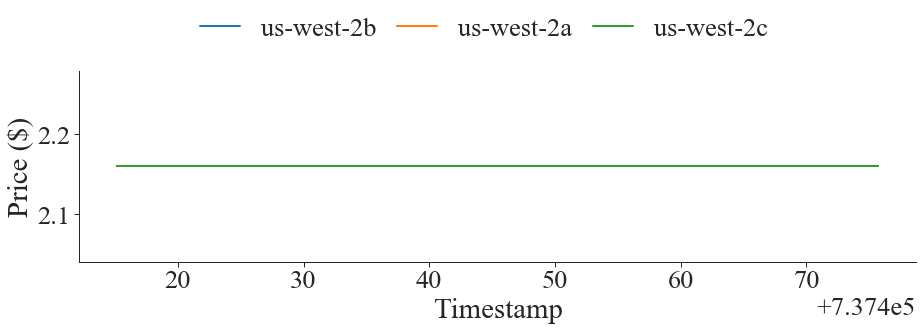

p3.16xlarge


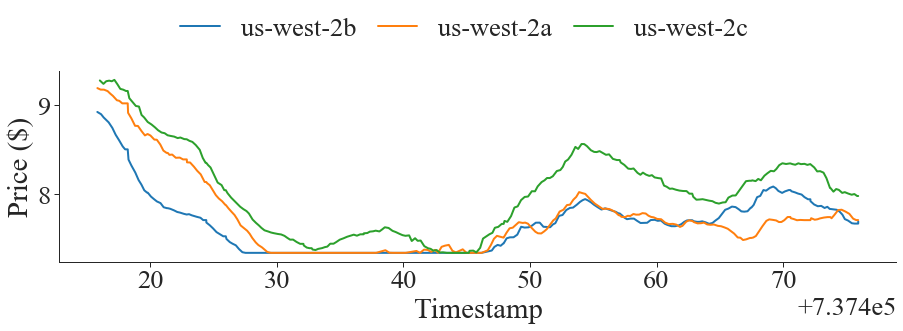

In [7]:
plot_prices(read_json_files("../logs/us-west-2"))